In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Wine dataset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [12]:
from sklearn.datasets import load_wine

In [13]:
d = load_wine(as_frame=True)
df_orig = d["data"]
y = np.array(d["target"])

df_orig.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
df_orig.shape

(178, 13)

In [15]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [16]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [17]:
# adding a fake categorical variable to see how to deal with it
cat_variable_1_values = ["red", "blue", "green"]
df_orig["color"] = [
    cat_variable_1_values[np.random.randint(0, len(cat_variable_1_values))]
    for _ in range(len(df_orig))
]

# creating an ordinal variable
df_orig["alcalinity_of_ash_binned"] = pd.qcut(
    df_orig["alcalinity_of_ash"], q=4, labels=False
)
X_orig = df_orig.values
df_orig.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,color,alcalinity_of_ash_binned
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,red,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,blue,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,red,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,red,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,blue,2


In [18]:
# one-hot encoding of categorical data
categorical_cols = ["color"]

df = pd.get_dummies(df_orig, columns=categorical_cols)
X = df.values
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_binned,color_blue,color_green,color_red
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,1,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  alcal

## Partitioning

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [22]:
# without stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33146067 0.3988764  0.26966292]
[0.32258065 0.39516129 0.28225806]
[0.35185185 0.40740741 0.24074074]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [24]:
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33146067 0.3988764  0.26966292]
[0.33064516 0.40322581 0.26612903]
[0.33333333 0.38888889 0.27777778]


In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 17) (54, 17) (124,) (54,)


## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
dt = DecisionTreeClassifier()

In [28]:
%%time
dt.fit(X_train, y_train)

CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 1.84 ms


DecisionTreeClassifier()

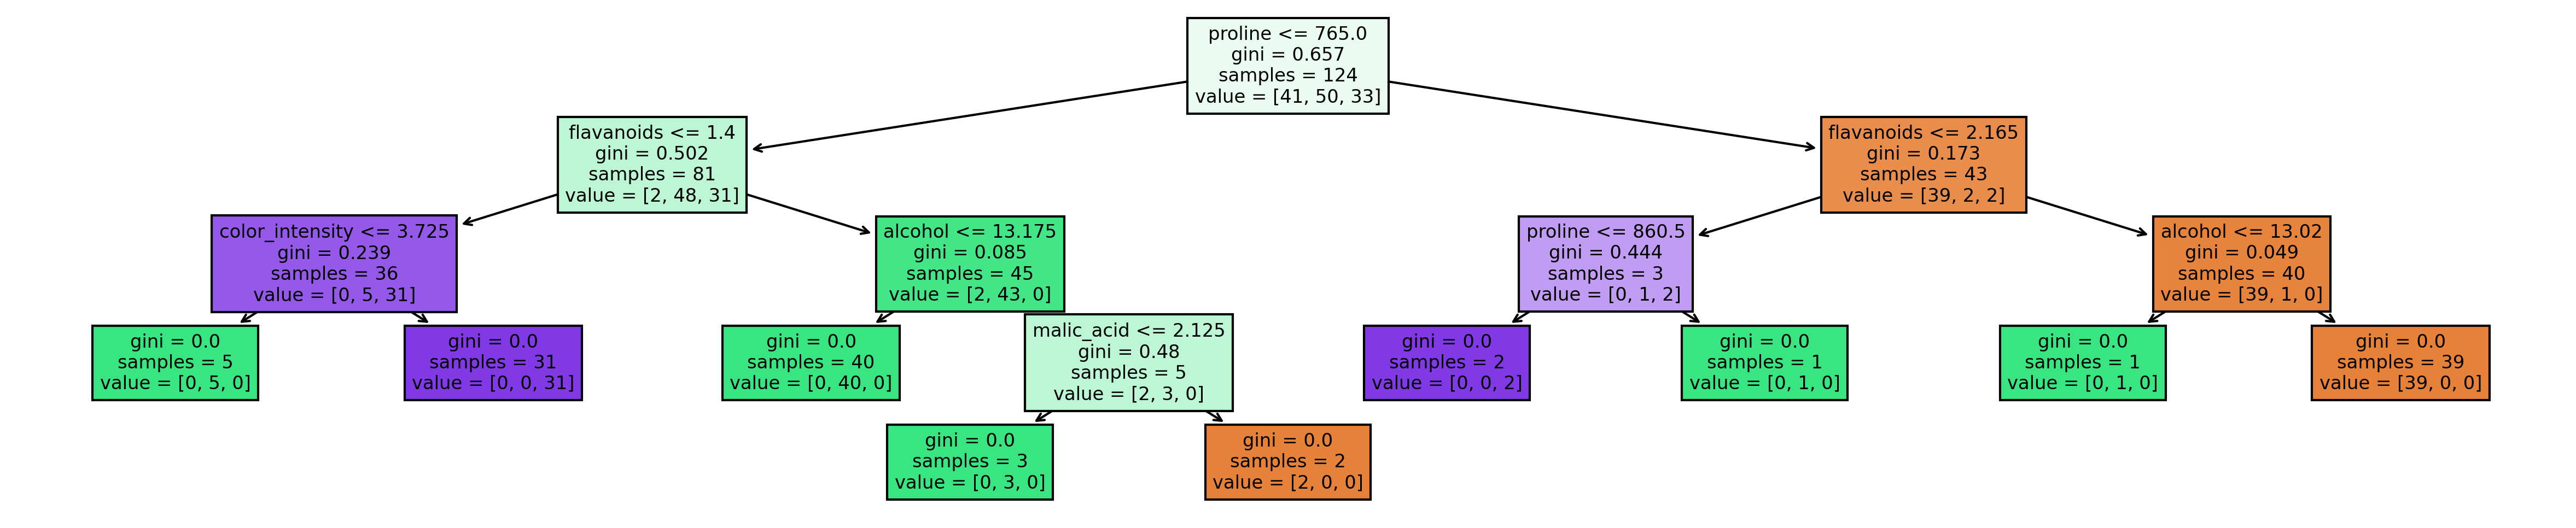

In [29]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=df.columns, filled=True)
plt.show()

In [30]:
dt.score(X_train, y_train)

1.0

#### Performance evaluation

In [33]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [35]:
y_train_pred = dt.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

1.0


In [36]:
y_train_pred, y_train

(array([2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0,
        1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2,
        0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1,
        0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1,
        1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1]),
 array([2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0,
        1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2,
        0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1,
        0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1,
        1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1]))

In [37]:
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))

0.9259259259259259
0.9253968253968253


In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.88      1.00      0.93        21
           2       1.00      0.87      0.93        15

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



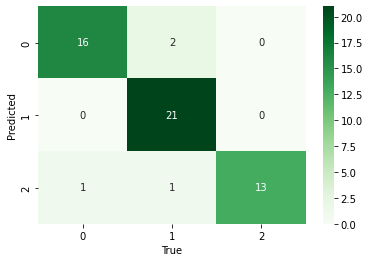

In [39]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [40]:
y_test_pred_proba = dt.predict_proba(X_test)

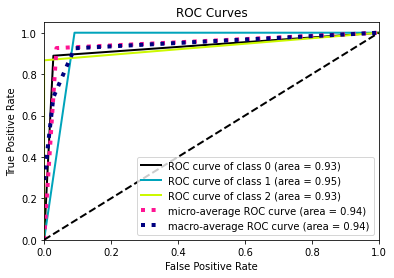

0.9394781144781144


In [41]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

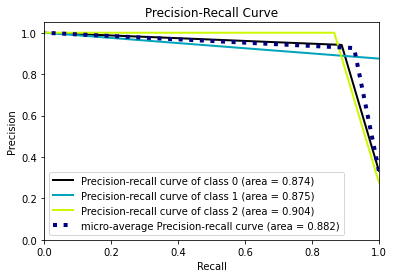

In [42]:
plot_precision_recall(y_test, dt.predict_proba(X_test))
plt.show()

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
max_depth = 2
dt = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dt, X_train, y_train, cv=5)
cross_val_score(dt, X_train, y_train, cv=5)

#### Decision Tree hyperparameters
max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for fractions.

In [ ]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

In [ ]:
max_depths = [2, 4, 6, 8, 10, 12, 16, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

In [ ]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

#### Grid search

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.001, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced"),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [ ]:
%%time
grid.fit(X_train, y_train)

In [ ]:
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from scipy.stats import uniform, randint, loguniform

In [ ]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

In [ ]:
clf.score(X_test, y_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

In [ ]:
clf.score(X_test_norm, y_test)

In [ ]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

In [ ]:
clf.score(X_test_norm, y_test)

In [ ]:
grid.cv_results_

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results

In [ ]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]

In [ ]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#### Gaussian

In [ ]:
clf = GaussianNB()

In [ ]:
%%time
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
clf.predict_proba(X_test)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

#### Categorical

In [ ]:
non_cat_columns = [
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280/od315_of_diluted_wines",
    "proline",
]

X_noncat = df[non_cat_columns].values

X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
    X_noncat, y, test_size=0.3, stratify=y, random_state=0
)

# train and test set should be binned separately
X_train_cat = list()
for column_idx in range(X_train_noncat.shape[1]):
    X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
X_train_cat = np.array(X_train_cat).T

X_test_cat = list()
for column_idx in range(X_test_noncat.shape[1]):
    X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
X_test_cat = np.array(X_test_cat).T

print(X_train_cat.shape, X_test_cat.shape)

In [ ]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train_noncat)

In [ ]:
y_pred = clf.predict(X_test_cat)

In [ ]:
print(classification_report(y_test, y_pred))

# Binary Classification Example

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()

In [ ]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0])
plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1])
plt.tight_layout()
plt.show()